# Lab: Convolutional Network Architectures

# 1. Preparation:

&emsp; The data was collected and published on Kaggle https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer by ARES. The collection of emotion detection datasets can be useful in the health domain as it can provide medical staff or caregivers with basic information about the patient's current situation. In addition, the data can also be used in the field of criminal investigation because it can assist the police in judging whether the criminal is lying according to the changing categories of the criminal's expression at that time so as to increase the efficiency of case handling.

## 1.1 Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance:

In [1]:
import numpy as np
import os
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

dimension = (48, 48)
X_train = np.empty([0,2304])
y_train = np.empty([0,1])
X_test = np.empty([0,2304])
y_test = np.empty([0,1])

for current_node, _, files in os.walk(r'archive/train'):
    index = 0
    for file in files:
        image_path = current_node + '/' + file
        current_image = cv2.imread(image_path)
        # Recolor to gray
        current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
        image_array = cv2.resize(current_image_gray, dimension)
        # Create a table of 1-D image
        X_train = np.row_stack((X_train, image_array.reshape(1, image_array.size)))
        y_train = np.row_stack((y_train, np.array([[os.path.basename(os.path.dirname(image_path))]])))
        if index == 1000:
            break
        else:
            index += 1

for current_node, _, files in os.walk(r'archive/test'):
    index = 0
    for file in files:
        image_path = current_node + '/' + file
        current_image = cv2.imread(image_path)
        # Recolor to gray
        current_image_gray = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
        image_array = cv2.resize(current_image_gray, dimension)
        # Create a table of 1-D image
        X_test = np.row_stack((X_test, image_array.reshape(1, image_array.size)))
        y_test = np.row_stack((y_test, np.array([[os.path.basename(os.path.dirname(image_path))]])))
        if index == 1000:
            break
        else:
            index += 1

def DealLabel(y_list):
    for every_picture in y_list:
        if every_picture[0] == 'angry':
            every_picture[0] = int(0)
        elif every_picture[0] == 'disgusted':
            every_picture[0] = int(1)
        elif every_picture[0] == 'fearful':
            every_picture[0] = int(2)
        elif every_picture[0] == 'happy':
            every_picture[0] = int(3)
        elif every_picture[0] == 'neutral':
            every_picture[0] = int(4)
        elif every_picture[0] == 'sad':
            every_picture[0] = int(5)
        elif every_picture[0] == 'surprised':
            every_picture[0] = int(6)

DealLabel(y_train)
DealLabel(y_test)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X = np.row_stack((X_train,X_test))
y = np.row_stack((y_train,y_test))

In [2]:
print(f'Data shape is: {X.shape}')
print(f'Target shape is: {y.shape}')
print(f'Sample number is: {X.shape[0]}')
print(f'Feature number is: {X.shape[1]}')
print(f'Classes number is: {len(np.unique(y))}')
print(f'Original image size is: {dimension[0]} * {dimension[1]}')

Data shape is: (12346, 2304)
Target shape is: (12346, 1)
Sample number is: 12346
Feature number is: 2304
Classes number is: 7
Original image size is: 48 * 48


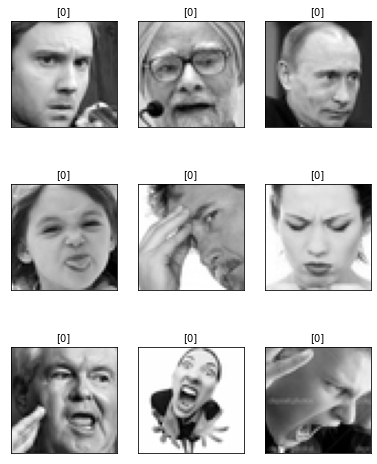

In [3]:
import matplotlib.pyplot as plt

def plot_gallery(images, labels, height, width, n_row=3, n_col=3):
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(labels[i], size=10)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X_train, y_train, dimension[0], dimension[1])

In [4]:
angry = []
disgusted = []
fearful = []
happy = []
neutral = []
sad = []
surprised = []


for i in y:
    if i == 0:
        angry.append(i)
    if i == 1:
        disgusted.append(i)
    if i == 2:
        fearful.append(i)
    if i == 3:
        happy.append(i)
    if i == 4:
        neutral.append(i)
    if i == 5:
        sad.append(i)
    if i == 6:
        surprised.append(i)

print(f'The number of angry is: {len(angry)}')
print(f'The number of disgusted is: {len(disgusted)}')
print(f'The number of fearful is: {len(fearful)}')
print(f'The number of happy is: {len(happy)}')
print(f'The number of neutral is: {len(neutral)}')
print(f'The number of sad is: {len(sad)}')
print(f'The number of surprised is: {len(surprised)}')

The number of angry is: 1959
The number of disgusted is: 547
The number of fearful is: 2002
The number of happy is: 2002
The number of neutral is: 2002
The number of sad is: 2002
The number of surprised is: 1832


&emsp; First of all, we would say the accuracy is the most straightforward metric for our custmer to evaluate our algorithm’s performance. The primary target of our model is to indentify the emotion of current subjects according to their facial expressions. As we known, emotion of our human could be complicated sometime. If our model produces less accurate result, medical personnel may make wrong judgments about the current situation of patients and take wrong medical treatment for them. In the worst case, the patients may lose their life. It is the last thing we want to see.<br>
&emsp; However, we think F2 score is the best metric for us to evaluate our algorithm’s performance. Because recall is also meaningful for our model. The F1 score can make sure that the precision will be as important as the recall, yet it is not the case in our model. Like I just mentioned above, precision, or we always call it accuracy, is also important. By using F2 metric, the weighted mean will be considered and break the importance balance between precision and recall according to https://towardsdatascience.com/is-f1-the-appropriate-criterion-to-use-what-about-f2-f3-f-beta-4bd8ef17e285.

&emsp; keras f2 metric: https://www.kaggle.com/code/ryanzhang/keras-f2-metric/notebook

In [5]:
import keras.backend as K

def f2_micro(y_true, y_pred):
    agreement = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    total_true_positive = K.sum(K.round(K.clip(y_true, 0, 1)))
    total_pred_positive = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = agreement / (total_true_positive + K.epsilon())
    precision = agreement / (total_pred_positive + K.epsilon())
    
    return (1+2**2)*((precision*recall)/(2**2*precision+recall+K.epsilon()))

## 1.2 Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Convince me that your cross validation method is a realistic mirroring of how an algorithm would be used in practice:

&emsp; As we can see from the previous part, the number of instances in the six classes is similar except for instances in class disgusted. The number of instances which belong to class disgusted is only 547, yet the numbers of instances which belong to other classes are around 2000. It is clear that our dataset is unbalanced. An imbalance dataset may result in potential risks when we train model. In order to eliminate the negetive influence of imbalance, we decide to import train_test_split package to perform the train and test partitioning of the dataset. Because train_test_split package is able to maintain the percentage of each class in the dataset and randomly split into train and test datasets with 8:2 ratio.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9876, 2304), (2470, 2304), (9876, 1), (2470, 1))

# 2. Modeling:

## 2.1 Setup the training to use data expansion in Keras (also called data augmentation). Explain why the chosen data expansion techniques are appropriate for your dataset. You can use the keras ImageGenerator as a pre-processing step OR in the optimization loop. You can also use the Keras-cv augmenter:

&emsp; Before we moving further, we decide to use ImageDataGenerator to achieve data expansion. The most important reason of choosing ImageDataGenerator is that actions such as rotations and vertical flips will be performed on our images randomly by ImageDataGenerator. Since the facial pictures of different people may be taken in different angles, training our model with rotated or flipped versions of original images could improve the prediction accuracy of our model for rotated and flipped images.<br>
&emsp; What's more, randomly rotate images in the range (degrees from 0 to 5) and randomly shift images horizontally and vertically (0.1 of total size) could also be a good way of reducing over-fitting and expanding the data.

In [7]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import average 
from tensorflow.keras.models import  Model

keras.__version__

'2.11.0'

In [8]:
X_train = X_train/255.0 - 0.5
X_test = X_test/255.0 - 0.5

NUM_CLASSES = 10
img_wh = 48

# Let's start by fixing the sizes, channels last
X_train = np.expand_dims(X_train.reshape((-1,img_wh,img_wh)), axis=3)
X_test = np.expand_dims(X_test.reshape((-1,img_wh,img_wh)), axis=3)

# and one hot encoding the output values
y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [9]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

datagen.fit(X_train)

## 2.2 Create a convolutional neural network to use on your data using Keras. Investigate at least two different convolutional network architectures (and investigate changing some parameters of each architecture such as the number of filters--at minimum have two variations of each network for a total of four models trained). Use the method of train/test splitting and evaluation metric that you argued for at the beginning of the lab. Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras). Be sure that models converge:

### convolutional network architecture 1:

In [10]:
epochs_number = 30
cnn_1_1 = Sequential()

# let's start with an AlexNet style convolutional phase
cnn_1_1.add(Conv2D(filters=32,
                input_shape = (img_wh,img_wh,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu', data_format="channels_last")) # more compact syntax

# no max pool before next conv layer!!
cnn_1_1.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn_1_1.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

# add one layer on flattened output
cnn_1_1.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn_1_1.add(Flatten())
cnn_1_1.add(Dense(128, activation='relu'))
cnn_1_1.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn_1_1.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnn_1_1.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy', f2_micro])

cnn_1_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 128)               4718720   
                                                        

In [11]:
%%time

cnn_1_1_model = cnn_1_1.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128),
                                      steps_per_epoch=int(len(X_train)/128),
                                      epochs=epochs_number, shuffle=True, verbose=1, 
                                      validation_data=(X_test,y_test_ohe), 
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/30
77/77 [==============================] - 22s 271ms/step - loss: 1.9893 - accuracy: 0.1927 - f2_micro: 0.0027 - val_loss: 1.8359 - val_accuracy: 0.2526 - val_f2_micro: 0.0000e+00
Epoch 2/30
77/77 [==============================] - 21s 267ms/step - loss: 1.8779 - accuracy: 0.2278 - f2_micro: 0.0053 - val_loss: 1.7758 - val_accuracy: 0.2757 - val_f2_micro: 0.0114
Epoch 3/30
77/77 [==============================] - 21s 273ms/step - loss: 1.8207 - accuracy: 0.2633 - f2_micro: 0.0173 - val_loss: 1.6902 - val_accuracy: 0.3457 - val_f2_micro: 0.0389
Epoch 4/30
77/77 [==============================] - 22s 283ms/step - loss: 1.7788 - accuracy: 0.2923 - f2_micro: 0.0299 - val_loss: 1.6511 - val_accuracy: 0.3676 - val_f2_micro: 0.0806
Epoch 5/30
77/77 [==============================] - 22s 284ms/step - loss: 1.7390 - accuracy: 0.3060 - f2_micro: 0.0444 - val_loss: 1.6308 - val_accuracy: 0.3713 - val_f2_micro: 0.0966
Epoch 6/30
77/77 [==============================] - 21s 278ms/step - lo

In [12]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
from skimage.io import imshow
import seaborn as sns
%matplotlib inline

labels = ["angry","disgusted","happy","neutral","sad","surprised"]
def summarize_net(net, X_test, y_test, title_text=''):
    plt.figure(figsize=(15,5))
    yhat = np.argmax(net.predict(X_test), axis=1)
    acc = mt.accuracy_score(y_test,yhat)
    cm = mt.confusion_matrix(y_test,yhat)
    cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels,yticklabels=labels)
    plt.title(title_text+'{:.4f}'.format(acc))

78/78 [==============================] - 1s 14ms/step


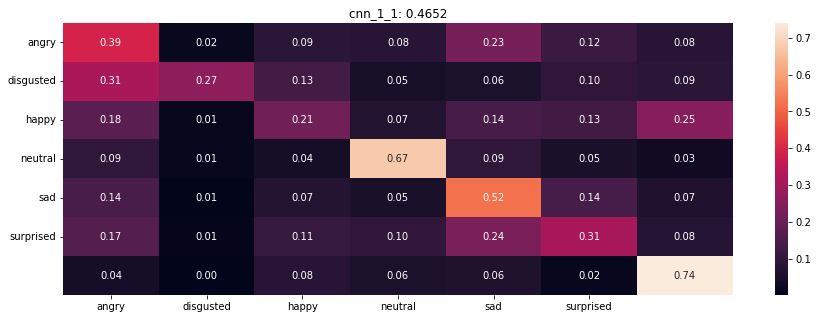

In [13]:
summarize_net(cnn_1_1, X_test, y_test, 'cnn_1_1: ')

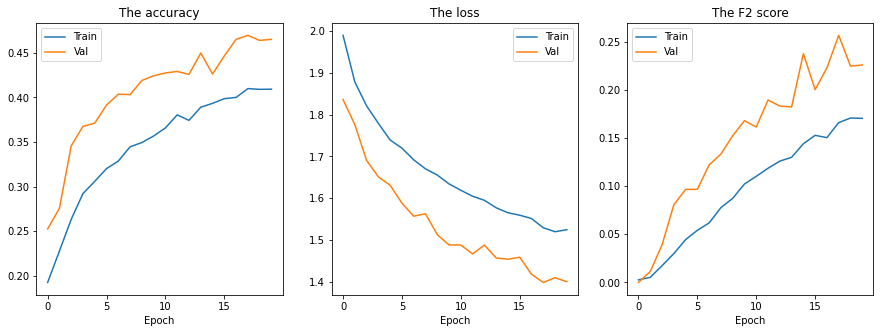

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].plot(cnn_1_1_model.history['accuracy'])
axs[0].plot(cnn_1_1_model.history['val_accuracy'])
axs[0].set_title('The accuracy')
axs[0].legend(['Train', 'Val'])

axs[1].plot(cnn_1_1_model.history['loss'])
axs[1].plot(cnn_1_1_model.history['val_loss'])
axs[1].set_title('The loss')
axs[1].legend(['Train', 'Val'])

axs[2].plot(cnn_1_1_model.history['f2_micro'])
axs[2].plot(cnn_1_1_model.history['val_f2_micro'])
axs[2].set_title('The F2 score')
axs[2].legend(['Train', 'Val'])
for ax in axs.flat:
    ax.set(xlabel='Epoch')

&emsp; Next, changing some parameters of each architecture, which is changing kernel size from (3,3) to (5,5).

In [15]:
cnn_1_2 = Sequential()

# let's start with an AlexNet style convolutional phase
cnn_1_2.add(Conv2D(filters=32,
                input_shape = (img_wh,img_wh,1),
                kernel_size=(5,5), 
                padding='same', 
                activation='relu', data_format="channels_last")) # more compact syntax

# no max pool before next conv layer!!
cnn_1_2.add(Conv2D(filters=64,
                kernel_size=(5,5), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn_1_2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

# add one layer on flattened output
cnn_1_2.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn_1_2.add(Flatten())
cnn_1_2.add(Dense(128, activation='relu'))
cnn_1_2.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn_1_2.add(Dense(NUM_CLASSES, activation='softmax'))

# Let's train the model 
cnn_1_2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy', f2_micro])

cnn_1_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        832       
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               4718720   
                                                      

In [16]:
%%time

cnn_1_2_model = cnn_1_2.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128),
                                      steps_per_epoch=int(len(X_train)/128),
                                      epochs=epochs_number, shuffle=True, verbose=1, 
                                      validation_data=(X_test,y_test_ohe), 
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/30
77/77 [==============================] - 35s 442ms/step - loss: 1.9676 - accuracy: 0.2009 - f2_micro: 0.0021 - val_loss: 1.8048 - val_accuracy: 0.2911 - val_f2_micro: 0.0000e+00
Epoch 2/30
77/77 [==============================] - 34s 441ms/step - loss: 1.8535 - accuracy: 0.2350 - f2_micro: 0.0119 - val_loss: 1.7314 - val_accuracy: 0.3215 - val_f2_micro: 0.0451
Epoch 3/30
77/77 [==============================] - 34s 440ms/step - loss: 1.8042 - accuracy: 0.2681 - f2_micro: 0.0268 - val_loss: 1.7103 - val_accuracy: 0.3057 - val_f2_micro: 0.0640
Epoch 4/30
77/77 [==============================] - 34s 442ms/step - loss: 1.7556 - accuracy: 0.3016 - f2_micro: 0.0383 - val_loss: 1.6131 - val_accuracy: 0.3964 - val_f2_micro: 0.0826
Epoch 5/30
77/77 [==============================] - 34s 442ms/step - loss: 1.7196 - accuracy: 0.3174 - f2_micro: 0.0562 - val_loss: 1.5822 - val_accuracy: 0.3955 - val_f2_micro: 0.0976
Epoch 6/30
77/77 [==============================] - 34s 441ms/step - lo

78/78 [==============================] - 2s 22ms/step


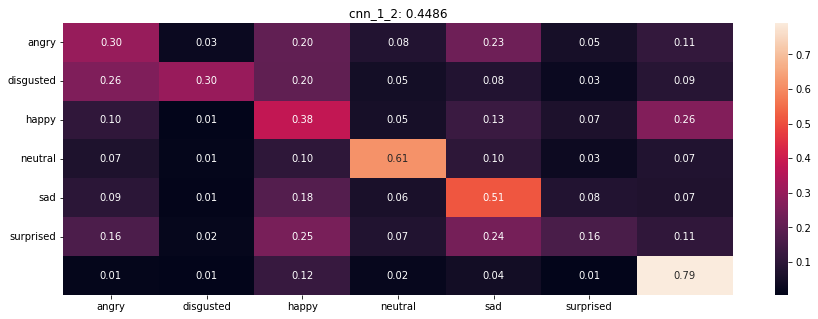

In [17]:
summarize_net(cnn_1_2, X_test, y_test, 'cnn_1_2: ')

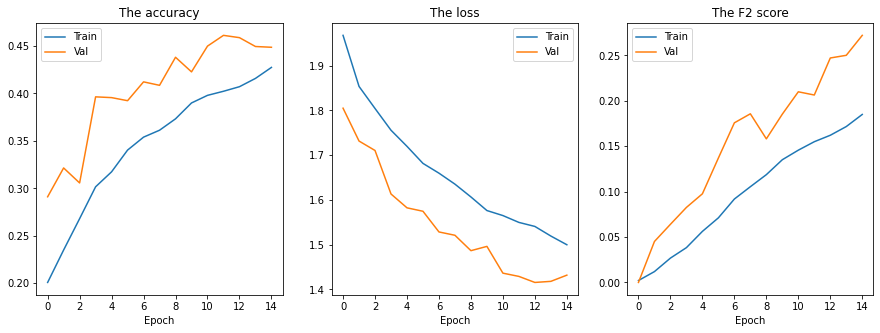

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].plot(cnn_1_2_model.history['accuracy'])
axs[0].plot(cnn_1_2_model.history['val_accuracy'])
axs[0].set_title('The accuracy')
axs[0].legend(['Train', 'Val'])

axs[1].plot(cnn_1_2_model.history['loss'])
axs[1].plot(cnn_1_2_model.history['val_loss'])
axs[1].set_title('The loss')
axs[1].legend(['Train', 'Val'])

axs[2].plot(cnn_1_2_model.history['f2_micro'])
axs[2].plot(cnn_1_2_model.history['val_f2_micro'])
axs[2].set_title('The F2 score')
axs[2].legend(['Train', 'Val'])
for ax in axs.flat:
    ax.set(xlabel='Epoch')

ROC for a categorical classifier: https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/

In [19]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

def ROCArea(y_test_, y_proba_):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = NUM_CLASSES
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_proba_[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_.ravel(), y_proba_.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    return fpr, tpr, roc_auc

78/78 [==============================] - 2s 22ms/step


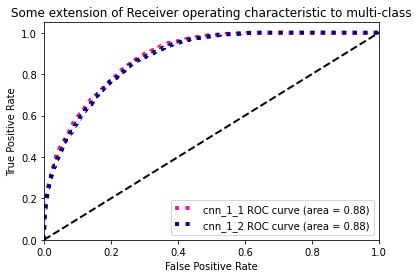

In [20]:
y_1_1 = cnn_1_1.predict(X_test)
y_1_2 = cnn_1_2.predict(X_test)
fpr_1_1, tpr_1_1, roc_auc_1_1 = ROCArea(y_test_ohe, y_1_1)
fpr_1_2, tpr_1_2, roc_auc_1_2 = ROCArea(y_test_ohe, y_1_2)

plt.figure(1)
plt.plot(fpr_1_1["micro"], tpr_1_1["micro"],
         label='cnn_1_1 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_1_1["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr_1_2["micro"], tpr_1_2["micro"],
         label='cnn_1_2 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_1_2["micro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

&emsp; From the ROC curve above, it is easy for us to conduct that the two implementations of the cnn_1 is quite similar despite we have already changed their kernel size. And it seems cnn_1 has done a good job in identify emotions since two cnn_1 have occupied 88 percent of area despite the change.

### convolutional network architecture 2:

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2 
l2_lambda = 0.0001

cnn_2_1 = Sequential()

cnn_2_1.add(Conv2D(filters=32,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',
                   data_format="channels_last")) # more compact syntax

cnn_2_1.add(Conv2D(filters=32,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last"))
cnn_2_1.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_2_1.add(Conv2D(filters=64,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last")) # more compact syntax

cnn_2_1.add(Conv2D(filters=64,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu'))
cnn_2_1.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_2_1.add(Conv2D(filters=128,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last")) # more compact syntax

cnn_2_1.add(Conv2D(filters=128,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last"))
    

# add one layer on flattened output

cnn_2_1.add(Flatten())
cnn_2_1.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn_2_1.add(Dense(128, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
           ))
cnn_2_1.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn_2_1.add(Dense(NUM_CLASSES, 
                  activation='softmax', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 ))

# Let's train the model 
cnn_2_1.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy', f2_micro])

cnn_2_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [22]:
%%time

cnn_2_1_model = cnn_2_1.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128),
                                      steps_per_epoch=int(len(X_train)/128),
                                      epochs=epochs_number, shuffle=True, verbose=1, 
                                      validation_data=(X_test,y_test_ohe), 
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/30
77/77 [==============================] - 31s 393ms/step - loss: 2.1146 - accuracy: 0.1842 - f2_micro: 0.0043 - val_loss: 1.9497 - val_accuracy: 0.2563 - val_f2_micro: 0.0020
Epoch 2/30
77/77 [==============================] - 31s 397ms/step - loss: 1.9681 - accuracy: 0.2423 - f2_micro: 0.0235 - val_loss: 1.8350 - val_accuracy: 0.2943 - val_f2_micro: 0.0852
Epoch 3/30
77/77 [==============================] - 30s 394ms/step - loss: 1.8934 - accuracy: 0.2806 - f2_micro: 0.0439 - val_loss: 1.7813 - val_accuracy: 0.3312 - val_f2_micro: 0.1011
Epoch 4/30
77/77 [==============================] - 30s 393ms/step - loss: 1.8342 - accuracy: 0.3031 - f2_micro: 0.0657 - val_loss: 1.6843 - val_accuracy: 0.3947 - val_f2_micro: 0.1069
Epoch 5/30
77/77 [==============================] - 30s 395ms/step - loss: 1.7622 - accuracy: 0.3519 - f2_micro: 0.1084 - val_loss: 1.6175 - val_accuracy: 0.4012 - val_f2_micro: 0.1835
Epoch 6/30
77/77 [==============================] - 30s 393ms/step - loss: 

78/78 [==============================] - 2s 22ms/step


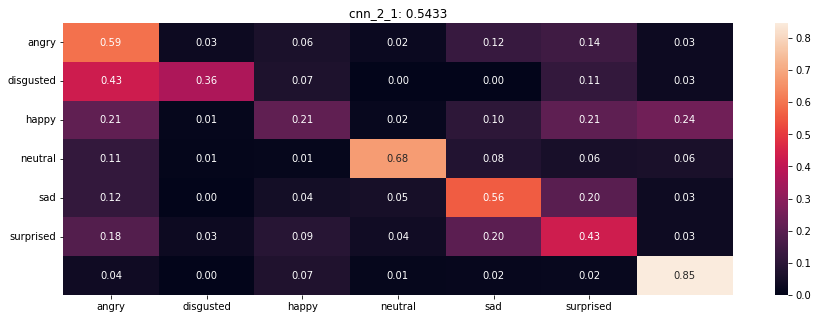

In [23]:
summarize_net(cnn_2_1, X_test, y_test, 'cnn_2_1: ')

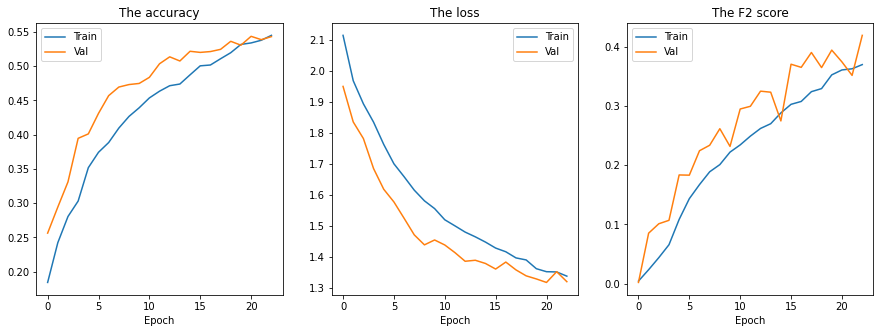

In [24]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].plot(cnn_2_1_model.history['accuracy'])
axs[0].plot(cnn_2_1_model.history['val_accuracy'])
axs[0].set_title('The accuracy')
axs[0].legend(['Train', 'Val'])

axs[1].plot(cnn_2_1_model.history['loss'])
axs[1].plot(cnn_2_1_model.history['val_loss'])
axs[1].set_title('The loss')
axs[1].legend(['Train', 'Val'])

axs[2].plot(cnn_2_1_model.history['f2_micro'])
axs[2].plot(cnn_2_1_model.history['val_f2_micro'])
axs[2].set_title('The F2 score')
axs[2].legend(['Train', 'Val'])
for ax in axs.flat:
    ax.set(xlabel='Epoch')

&emsp; Next, changing some parameters of each architecture, which is changing kernel size from (3,3) to (5,5).

In [25]:
cnn_2_2 = Sequential()

cnn_2_2.add(Conv2D(filters=32,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(5,5),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',
                   data_format="channels_last")) # more compact syntax

cnn_2_2.add(Conv2D(filters=32,
                   kernel_size=(5,5),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last"))
cnn_2_2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_2_2.add(Conv2D(filters=64,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(5,5),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last")) # more compact syntax

cnn_2_2.add(Conv2D(filters=64,
                   kernel_size=(5,5),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu'))
cnn_2_2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_2_2.add(Conv2D(filters=128,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(5,5),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last")) # more compact syntax

cnn_2_2.add(Conv2D(filters=128,
                   kernel_size=(5,5),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last"))
    

# add one layer on flattened output

cnn_2_2.add(Flatten())
cnn_2_2.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn_2_2.add(Dense(128, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
           ))
cnn_2_2.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn_2_2.add(Dense(NUM_CLASSES, 
                  activation='softmax', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 ))

# Let's train the model 
cnn_2_2.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy', f2_micro])

cnn_2_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 32)        832       
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 64)        51264     
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        102464    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [26]:
%%time

cnn_2_2_model = cnn_2_2.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128),
                                      steps_per_epoch=int(len(X_train)/128),
                                      epochs=epochs_number, shuffle=True, verbose=1, 
                                      validation_data=(X_test,y_test_ohe), 
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/30
77/77 [==============================] - 61s 782ms/step - loss: 2.4786 - accuracy: 0.1663 - f2_micro: 0.0049 - val_loss: 2.0969 - val_accuracy: 0.2000 - val_f2_micro: 0.0000e+00
Epoch 2/30
77/77 [==============================] - 60s 779ms/step - loss: 2.0522 - accuracy: 0.1868 - f2_micro: 0.0013 - val_loss: 1.9203 - val_accuracy: 0.2551 - val_f2_micro: 0.0049
Epoch 3/30
77/77 [==============================] - 60s 776ms/step - loss: 1.9493 - accuracy: 0.2457 - f2_micro: 0.0293 - val_loss: 1.8403 - val_accuracy: 0.2923 - val_f2_micro: 0.0409
Epoch 4/30
77/77 [==============================] - 60s 781ms/step - loss: 1.8812 - accuracy: 0.2723 - f2_micro: 0.0529 - val_loss: 1.7756 - val_accuracy: 0.3287 - val_f2_micro: 0.0749
Epoch 5/30
77/77 [==============================] - 61s 794ms/step - loss: 1.8184 - accuracy: 0.3111 - f2_micro: 0.0807 - val_loss: 1.6771 - val_accuracy: 0.3814 - val_f2_micro: 0.1152
Epoch 6/30
77/77 [==============================] - 62s 805ms/step - lo

78/78 [==============================] - 3s 38ms/step


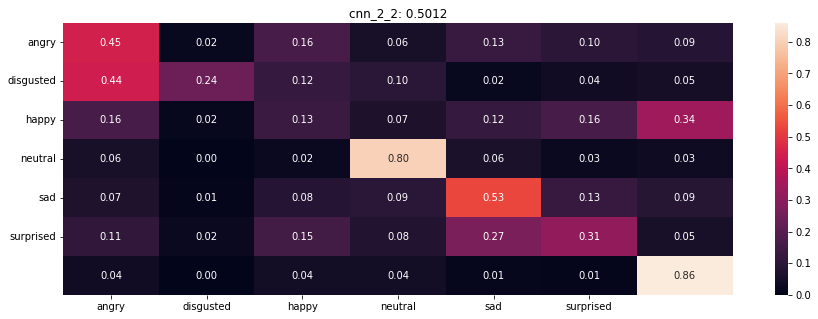

In [27]:
summarize_net(cnn_2_2, X_test, y_test, 'cnn_2_2: ')

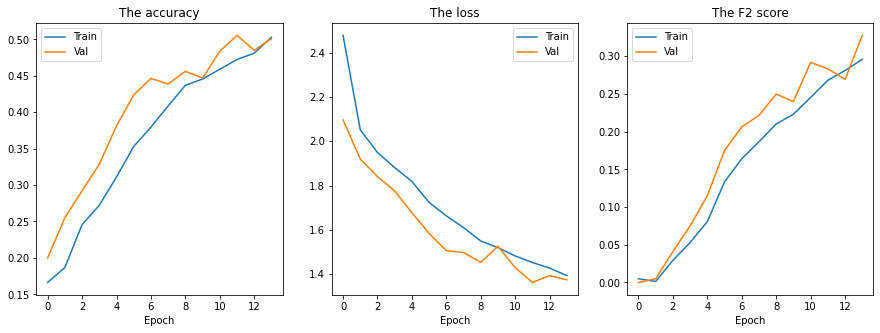

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].plot(cnn_2_2_model.history['accuracy'])
axs[0].plot(cnn_2_2_model.history['val_accuracy'])
axs[0].set_title('The accuracy')
axs[0].legend(['Train', 'Val'])

axs[1].plot(cnn_2_2_model.history['loss'])
axs[1].plot(cnn_2_2_model.history['val_loss'])
axs[1].set_title('The loss')
axs[1].legend(['Train', 'Val'])

axs[2].plot(cnn_2_2_model.history['f2_micro'])
axs[2].plot(cnn_2_2_model.history['val_f2_micro'])
axs[2].set_title('The F2 score')
axs[2].legend(['Train', 'Val'])
for ax in axs.flat:
    ax.set(xlabel='Epoch')

78/78 [==============================] - 3s 38ms/step


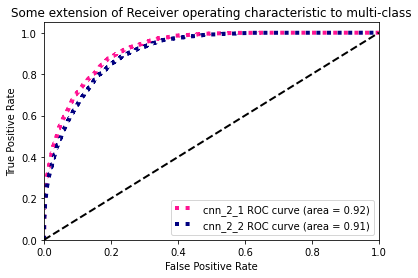

In [29]:
y_2_1 = cnn_2_1.predict(X_test)
y_2_2 = cnn_2_2.predict(X_test)
fpr_2_1, tpr_2_1, roc_auc_2_1 = ROCArea(y_test_ohe, y_2_1)
fpr_2_2, tpr_2_2, roc_auc_2_2 = ROCArea(y_test_ohe, y_2_2)

plt.figure(1)
plt.plot(fpr_2_1["micro"], tpr_2_1["micro"],
         label='cnn_2_1 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_2_1["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr_2_2["micro"], tpr_2_2["micro"],
         label='cnn_2_2 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_2_2["micro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

&emsp; From the ROC curve above, it seems the  cnn_2_1 perform better than the  cnn_2_2 since cnn_2_1 has occupied 92 percent of area, yet the cnn_2_2 only has occupied 91 percent of area. We may conduct that the small kernel size the convolutional network architecture has the better performance.

## 2.3 Visualize the final results of the CNNs and interpret/compare the performances. Use proper statistics as appropriate, especially for comparing models:

78/78 [==============================] - 3s 39ms/step


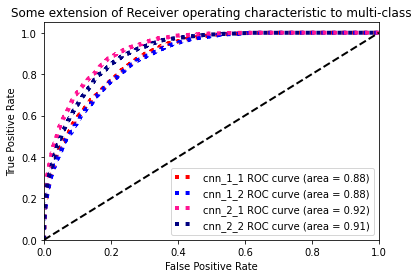

In [30]:
y_1_1 = cnn_1_1.predict(X_test)
y_1_2 = cnn_1_2.predict(X_test)
y_2_1 = cnn_2_1.predict(X_test)
y_2_2 = cnn_2_2.predict(X_test)

fpr_1_1, tpr_1_1, roc_auc_1_1 = ROCArea(y_test_ohe, y_1_1)
fpr_1_2, tpr_1_2, roc_auc_1_2 = ROCArea(y_test_ohe, y_1_2)
fpr_2_1, tpr_2_1, roc_auc_2_1 = ROCArea(y_test_ohe, y_2_1)
fpr_2_2, tpr_2_2, roc_auc_2_2 = ROCArea(y_test_ohe, y_2_2)

plt.figure(1)
plt.plot(fpr_1_1["micro"], tpr_1_1["micro"],
         label='cnn_1_1 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_1_1["micro"]),
         color='red', linestyle=':', linewidth=4)

plt.plot(fpr_1_2["micro"], tpr_1_2["micro"],
         label='cnn_1_2 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_1_2["micro"]),
         color='blue', linestyle=':', linewidth=4)

plt.plot(fpr_2_1["micro"], tpr_2_1["micro"],
         label='cnn_2_1 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_2_1["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr_2_2["micro"], tpr_2_2["micro"],
         label='cnn_2_2 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_2_2["micro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

&emsp; According to the above figure, we can conclude that cnn_2_1 is the best convolutional network architecture.

## 2.4 Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. Use proper statistical comparison techniques:

MLP:

In [31]:
%%time

# make a keras MLP
mlp = Sequential()
mlp.add( Flatten() )
mlp.add( Dense(input_dim=X_train.shape[1], units=100, activation='relu') )
mlp.add( Dense(units=50, activation='relu') )
mlp.add( Dense(units=50, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

mlp.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', f2_micro])

mlp_model = mlp.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128), 
                              steps_per_epoch=int(len(X_train)/128),
                              epochs=epochs_number, shuffle=True, verbose=1,
                              validation_data=(X_test,y_test_ohe)
                             )

Epoch 1/30
77/77 [==============================] - 3s 38ms/step - loss: 1.9329 - accuracy: 0.2151 - f2_micro: 0.0020 - val_loss: 1.8200 - val_accuracy: 0.2421 - val_f2_micro: 9.9384e-04
Epoch 2/30
77/77 [==============================] - 3s 35ms/step - loss: 1.8229 - accuracy: 0.2586 - f2_micro: 0.0083 - val_loss: 1.7958 - val_accuracy: 0.2862 - val_f2_micro: 0.0173
Epoch 3/30
77/77 [==============================] - 3s 36ms/step - loss: 1.8020 - accuracy: 0.2678 - f2_micro: 0.0170 - val_loss: 1.7602 - val_accuracy: 0.2834 - val_f2_micro: 0.0295
Epoch 4/30
77/77 [==============================] - 3s 35ms/step - loss: 1.7930 - accuracy: 0.2745 - f2_micro: 0.0228 - val_loss: 1.7402 - val_accuracy: 0.3215 - val_f2_micro: 0.0300
Epoch 5/30
77/77 [==============================] - 3s 35ms/step - loss: 1.7761 - accuracy: 0.2889 - f2_micro: 0.0277 - val_loss: 1.7363 - val_accuracy: 0.3150 - val_f2_micro: 0.0349
Epoch 6/30
77/77 [==============================] - 3s 36ms/step - loss: 1.7755 -

In [32]:
y_mlp = mlp.predict(X_test)

78/78 [==============================] - 0s 904us/step


In [33]:
def compare_mlp_cnn(cnn, mlp, X_test, y_test, labels='auto'):
    plt.figure(figsize=(15,5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
        acc_cnn = mt.accuracy_score(y_test,yhat_cnn)
        plt.subplot(1,2,1)
        cm = mt.confusion_matrix(y_test,yhat_cnn)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f',xticklabels=labels,yticklabels=labels)
        plt.title('CNN: '+str(acc_cnn))
    
    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test,yhat_mlp)
        plt.subplot(1,2,2)
        cm = mt.confusion_matrix(y_test,yhat_mlp)
        cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
        sns.heatmap(cm,annot=True, fmt='.2f',xticklabels=labels,yticklabels=labels)
        plt.title('MLP: '+str(acc_mlp))

78/78 [==============================] - 0s 917us/step


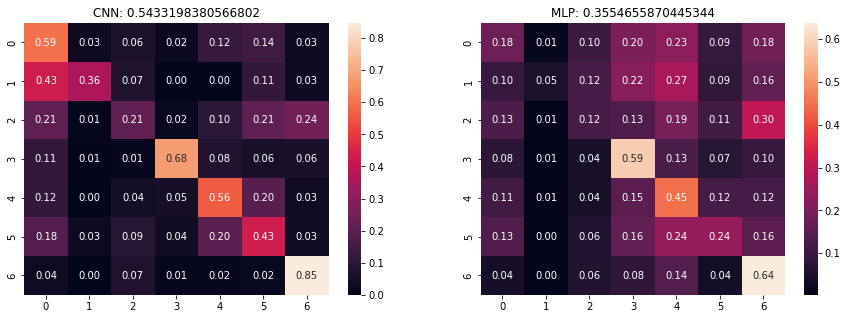

In [35]:
compare_mlp_cnn(cnn_2_1,mlp,X_test,y_test)

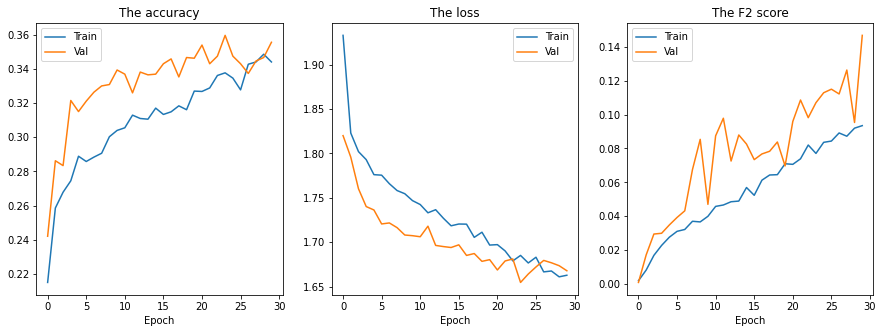

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].plot(mlp_model.history['accuracy'])
axs[0].plot(mlp_model.history['val_accuracy'])
axs[0].set_title('The accuracy')
axs[0].legend(['Train', 'Val'])

axs[1].plot(mlp_model.history['loss'])
axs[1].plot(mlp_model.history['val_loss'])
axs[1].set_title('The loss')
axs[1].legend(['Train', 'Val'])

axs[2].plot(mlp_model.history['f2_micro'])
axs[2].plot(mlp_model.history['val_f2_micro'])
axs[2].set_title('The F2 score')
axs[2].legend(['Train', 'Val'])
for ax in axs.flat:
    ax.set(xlabel='Epoch')

78/78 [==============================] - 2s 22ms/step


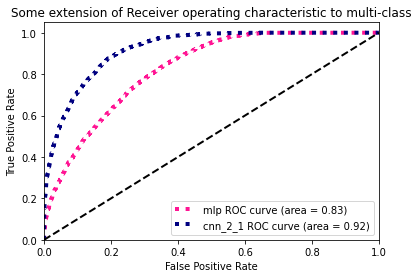

In [37]:
y_mlp = mlp.predict(X_test)
y_2_1 = cnn_2_1.predict(X_test)
fpr_mlp, tpr_mlp, roc_auc_mlp = ROCArea(y_test_ohe, y_mlp)
fpr_2_1, tpr_2_1, roc_auc_2_1 = ROCArea(y_test_ohe, y_2_1)

plt.figure(1)
plt.plot(fpr_mlp["micro"], tpr_mlp["micro"],
         label='mlp ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_mlp["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr_2_1["micro"], tpr_2_1["micro"],
         label='cnn_2_1 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_2_1["micro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

&emsp; As we can see from the ROC curve above, it is obvious that the cnn_2_1 perform better than the MLP since cnn_2_1 has occupied 92 percent of area, yet the MLP only has occupied 83 percent of area. However, we also should remember that the kernel size is essential for the cnn_2_1. If we assign a relatively big kernel size, the cnn_2_1 may perform worse than MLP.

# 3. Exceptional Work:

In [39]:
cnn_transfer = Sequential()

cnn_transfer.add(Conv2D(filters=32,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',
                   data_format="channels_last")) # more compact syntax

cnn_transfer.add(Conv2D(filters=32,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last"))

cnn_transfer.layers[0].set_weights(cnn_2_1.layers[0].get_weights())
cnn_transfer.layers[1].set_weights(cnn_2_1.layers[1].get_weights())

cnn_transfer.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_transfer.add(Conv2D(filters=64,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last")) # more compact syntax

cnn_transfer.add(Conv2D(filters=64,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu'))

cnn_transfer.layers[3].set_weights(cnn_2_1.layers[3].get_weights())
cnn_transfer.layers[4].set_weights(cnn_2_1.layers[4].get_weights())

cnn_transfer.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_transfer.add(Conv2D(filters=128,
                   input_shape = (img_wh,img_wh,1),
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last")) # more compact syntax

cnn_transfer.add(Conv2D(filters=128,
                   kernel_size=(3,3),
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda),
                   padding='same', 
                   activation='relu',data_format="channels_last"))

cnn_transfer.layers[6].set_weights(cnn_2_1.layers[6].get_weights())
cnn_transfer.layers[7].set_weights(cnn_2_1.layers[7].get_weights())

# add one layer on flattened output

cnn_transfer.add(Flatten())
cnn_transfer.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn_transfer.add(Dense(128, 
                  activation='relu',
                  kernel_initializer='he_uniform',
                  kernel_regularizer=l2(l2_lambda)
           ))
cnn_transfer.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn_transfer.add(Dense(NUM_CLASSES, 
                  activation='softmax', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)
                 ))

# Let's train the model 
cnn_transfer.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
                optimizer='rmsprop', # 'adadelta' 'rmsprop'
                metrics=['accuracy', f2_micro])

cnn_transfer.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [40]:
%%time

cnn_transfer_model = cnn_transfer.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=128),
                                      steps_per_epoch=int(len(X_train)/128),
                                      epochs=epochs_number, shuffle=True, verbose=1, 
                                      validation_data=(X_test,y_test_ohe), 
                                      callbacks=[EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/30
77/77 [==============================] - 32s 403ms/step - loss: 1.6026 - accuracy: 0.4354 - f2_micro: 0.2465 - val_loss: 1.3654 - val_accuracy: 0.5271 - val_f2_micro: 0.3430
Epoch 2/30
77/77 [==============================] - 31s 398ms/step - loss: 1.4247 - accuracy: 0.5032 - f2_micro: 0.3295 - val_loss: 1.3368 - val_accuracy: 0.5332 - val_f2_micro: 0.4025
Epoch 3/30
77/77 [==============================] - 31s 397ms/step - loss: 1.3605 - accuracy: 0.5334 - f2_micro: 0.3660 - val_loss: 1.3102 - val_accuracy: 0.5356 - val_f2_micro: 0.4268
Epoch 4/30
77/77 [==============================] - 31s 403ms/step - loss: 1.3315 - accuracy: 0.5429 - f2_micro: 0.3817 - val_loss: 1.2938 - val_accuracy: 0.5538 - val_f2_micro: 0.3863
Epoch 5/30
77/77 [==============================] - 32s 411ms/step - loss: 1.3216 - accuracy: 0.5535 - f2_micro: 0.3900 - val_loss: 1.3404 - val_accuracy: 0.5482 - val_f2_micro: 0.4294
Epoch 6/30
77/77 [==============================] - 31s 406ms/step - loss: 

78/78 [==============================] - 2s 22ms/step


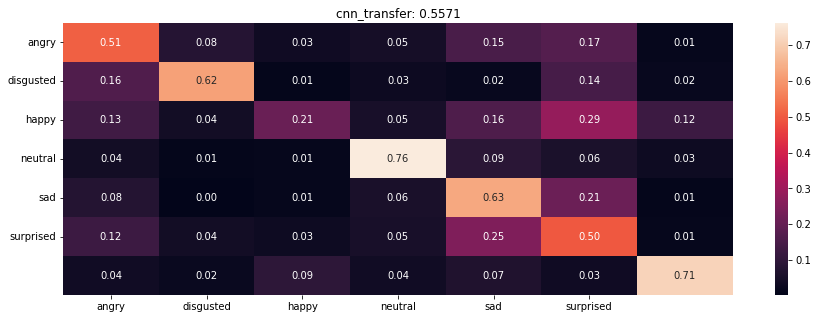

In [41]:
summarize_net(cnn_transfer, X_test, y_test, 'cnn_transfer: ')

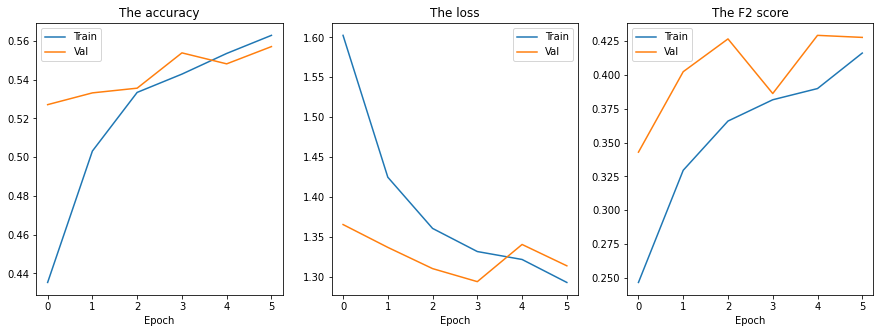

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].plot(cnn_transfer_model.history['accuracy'])
axs[0].plot(cnn_transfer_model.history['val_accuracy'])
axs[0].set_title('The accuracy')
axs[0].legend(['Train', 'Val'])

axs[1].plot(cnn_transfer_model.history['loss'])
axs[1].plot(cnn_transfer_model.history['val_loss'])
axs[1].set_title('The loss')
axs[1].legend(['Train', 'Val'])

axs[2].plot(cnn_transfer_model.history['f2_micro'])
axs[2].plot(cnn_transfer_model.history['val_f2_micro'])
axs[2].set_title('The F2 score')
axs[2].legend(['Train', 'Val'])
for ax in axs.flat:
    ax.set(xlabel='Epoch')

78/78 [==============================] - 2s 22ms/step


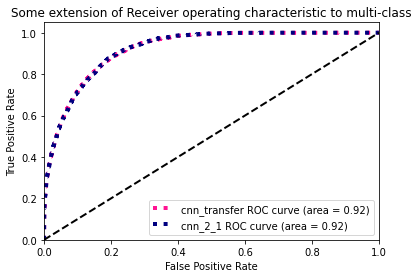

In [43]:
y_transfer = cnn_transfer.predict(X_test)
y_2_1 = cnn_2_1.predict(X_test)
fpr_transfer, tpr_transfer, roc_auc_transfer = ROCArea(y_test_ohe, y_transfer)
fpr_2_1, tpr_2_1, roc_auc_2_1 = ROCArea(y_test_ohe, y_2_1)

plt.figure(1)
plt.plot(fpr_transfer["micro"], tpr_transfer["micro"],
         label='cnn_transfer ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_transfer["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr_2_1["micro"], tpr_2_1["micro"],
         label='cnn_2_1 ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_2_1["micro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

&emsp; According to the ROC curve above, the performance of the cnn_2_1 with transfer learning is better than the cnn_2_1 without transfer learning. Although the cnn_2_1 with transfer learning and the cnn_2_1 without transfer learning have both occupied 90 percent of area, the cnn_2_1 with transfer learning has better accuracy and f2 scores than the cnn_2_1 without transfer learning. We could conduct that the transfer learning is extremely essential as long as the cnn_2_1 has been assigned a relative small kernel size.